In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
# Carreguem el dataset
df = pd.read_csv('train.csv')

# Pràctica 1: Resolem un problema de classificació

## Objectius

Els objectius d’aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificació, tècniques d’emplenament de valors perduts i validació creuada.

* Comparar diferents models de classificació.

* Realitzar la cerca d’hiperparàmetres.

* Entendre i implementar la validació creuada.

* Analitzar detalladament els resultats obtinguts durant l’entrenament dels diferents models.

Aquesta pràctica és prèvia al cas Kaggle que realitzareu durant la segona part de l’assignatura. En aquesta primera fase les preguntes estan definides, però us ha de servir d’aprenentatge per saber com estructurar un projecte d’aprenentatge automàtic, ja que en el cas Kaggle no tindreu les preguntes pautades.

## Bases de dades
En aquesta pràctica farem servir la base de dades del *Titanic*. L’atribut a predir és *Survived*, que indica si cada passatger va sobreviure o no.

[Enllaç a les dades](https://www.kaggle.com/c/titanic/data)

## Treball en grup

La pràctica es durà a terme en grups de 2 o 3 persones. En casos excepcionals i degudament justificats, es podrà realitzar de manera individual.

## Seguiment i entrega de la pràctica

A la Pràctica 1 es proposen diverses tasques per fer una comparació adequada dels resultats obtinguts amb diferents mètodes de classificació aplicats a una mateixa base de dades.

Es realitzaran sessions de seguiment del treball, orientades a resoldre dubtes sobre les dades, aclarir els objectius de cada apartat de l’enunciat i comentar els resultats obtinguts durant l’anàlisi. És molt recomanable assistir-hi amb el treball ja avançat per tal de poder aprofitar millor la sessió.

Pel que fa a l’entrega, caldrà lliurar a través de Caronte el següent:

1. *Memòria* en format PDF o en la mateixa notebook, explicant els resultats obtinguts sobre la base de dades i incloent el codi en Python corresponent. Aquesta nota serà la mateixa per a tots els membres del grup. (9 punts)

2. *Presentació* amb els resultats (màxim 4 minuts). Aquesta nota serà individual. (1 punt)

*Nota*: En cas d’entregar la memòria en format PDF, cal adjuntar el codi en Python per separat. Si s’entrega en format notebook, aquest mateix document ja servirà com a codi.


# Continguts que s’avaluaran en la pràctica

1. **EDA (Exploratory Data Analysis)** – 1 punt

* Anàlisi de la mida i tipologia de les dades (0.25 pts)

* Primera valoració de correlacions (0.5 pts)

* Anàlisi de l’atribut target (0.25 pts)

2. **Preprocessament** – 2 punts

* Eliminació de valors nuls (0.5 pts)

* Codificació de variables categòriques (0.75 pts)

* Altres (PCA, normalització, etc.) (0.75 pts)

3. **Selecció de mètriques** – 1.5 punts

* Selecció de la mètrica més adequada pel problema (0.75 pts)

* Visualització de corbes ROC/AUC (0.75 pts)

4. **Selecció de models amb validació creuada** – 4 punts

* Selecció del millor model (2 pts)

* Cerca d’hiperparàmetres (2 pts)

5. **Anàlisi final** – 1.5 punts

Cal tenir en compte que les puntuacions dins de cada apartat són orientatives. La pràctica està estructurada a partir d’un seguit de preguntes guia en cada secció, relacionades amb els continguts avaluables. **No cal respondre-les totes**: el seu objectiu és ajudar-vos a reflexionar i aprofundir en els aspectes clau de cada apartat. Tot i així, és recomanable llegir-les prèviament i tenir-les en compte durant el desenvolupament de la pràctica.

**IMPORTANT**: El criteri principal d’avaluació serà la capacitat de mantenir una narrativa coherent a mesura que es presenten els resultats. No es penalitzarà deixar alguna pregunta sense respondre, sempre que el procés seguit i les conclusions extretes a partir dels resultats siguin consistents i ben fonamentats.

### 1. EDA (*Exploratory Data Analysis*) – **1 punt**

Abans de començar, és fonamental analitzar la base de dades assignada.  

**Preguntes:**  
-  Quants atributs té la base de dades? 
    - 12 
-  Quin tipus d’atributs hi ha? (numèrics, temporals, categòrics, binaris, ...)  

    - PassengerID → Numeric
    - Survived→Binari
    - Pclass→Categòric
    - Name→Categórico
    - Sex → Categòric
    - Age → numeric
    - Sibsp → numeric
    - Parch → numeric
    - embarked → Categoric
    - Ticket→Categòric
    - Fare→ Numeric
    - Cabin→Categòric
    - Embarked→Categòric

-  Com és el *target*? Quantes categories diferents té?  
    
-  Hi ha valors nuls (*NaNs*) a les dades?  
    - Columnes Amb NaNs:
        - Age : 177
        - Cabin : 687
        - Embarked : 2
    - Com podem veure hi ha 3 columnes amb Nans, els mes destacables son Age i cabin. pel que fa Age suposem que es ja que a alguns passatgers no es va tenir el registre correcte de la seva edat. Per altre banda Cabin, que tenim molts NaNs ja que dels 891 p, i perassatges, 687 d'ells no tenien Cabina. Per utlim de 2 passatgers no se sap on van embarcar, suposem qeue s tracte de un error en el registre d'ells.
-  Les etiquetes estan balancejades? (és a dir, hi ha una distribució similar entre categories?) Creus que la seva distribució pot afectar la classificació?  

    - NO estan balencejada ja que per exemple hi ha bastants més homes que dones, va sobreviure molta menys gent de la que no ho va, les classes hi ha moltes mes persones de 3ra que de 1ra...Aixo pot dur a errors de detecció sobretot en les minories degut a aixo. el que també es un problema es el desbalansajament en y (supervivents o no supervivents), ja que si tenim que va morir un 62 percent dels passatges, podriem sempre donar com a resultat que mor i tindriem un 62% de accuracy.

-  Es poden observar correlacions entre les variables explicatives (*X*) i la variable objectiu (*y*)? 
    - Si Analitzem els 8 gàrfics de sota els cuals ens mostres relacio entre:
        - Supervivent Homes vs Dones.
        - Supervivencia Depenent del Port d'embarcament.
        - Supervivecnia segons la classe del passatger.
        - Supervivencia segons la edat
    - El nostre analisis ens ha determinat que el port d'embarcament no va tenir ningun tipus de relacio entre sobreviure o no ja que son proporcionalment bastant similars els dos grafs.
    - Per altre banda si que es pot veure que van sobreviure moltes mes dones que homes tot hi haber mes homes a la embarcació. per tant aqui si que tenim una relció entre x i y.
    - On si que trobaem una relacio molt notable entre la 'x' i 'y', seria la classe del passatger, ja que els que mes van sobreviure van ser els de 1ra classe teninnt en compte que era la classe menys numerosa entre els passatgers, i en cambi la classe on propriconalment es va morir mes gent e sla 3ra classe amb una gran diferencia.
    - Finalment per la edat tambépodem veure certa relacio en la supervivencia, en els nostres grafics em establerts 5 rangs de edats:
        - Ni


C:\Users\Serra\AppData\Local\Temp\ipykernel_17620\4058119787.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('Age_Group')['Survived'].sum()


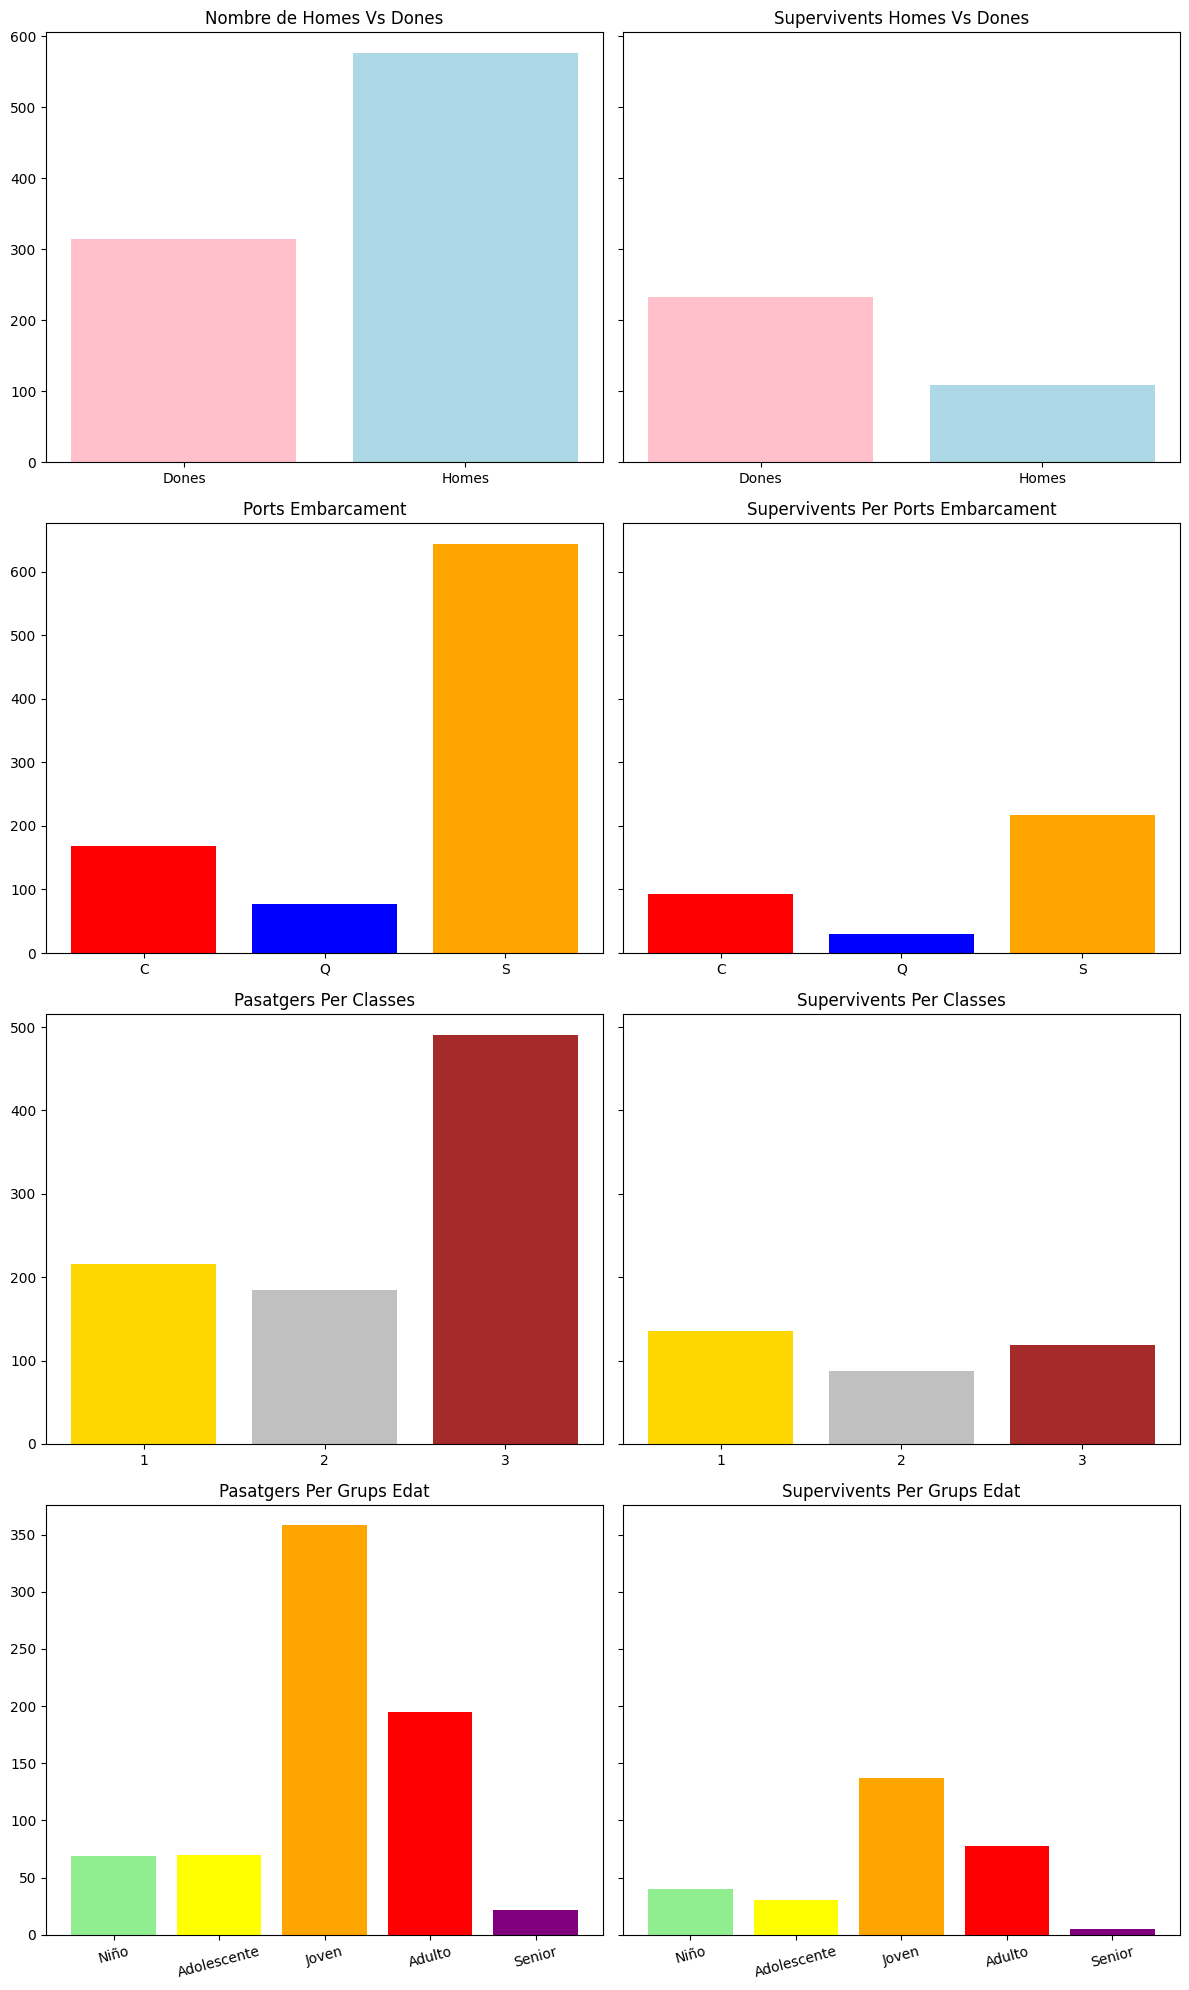

In [ ]:
survival_by_sex = df.groupby("Sex")["Survived"].sum()
survival_by_embarked = df.groupby("Embarked")["Survived"].sum()
survival_by_class = df.groupby("Pclass")["Survived"].sum()

number_by_sex = df["Sex"].value_counts().sort_index()
number_by_embarked = df["Embarked"].value_counts().sort_index()
number_by_class = df["Pclass"].value_counts().sort_index()


bins = [0, 12, 18, 35, 60, 100]
labels = ['Nen', 'Adolescent', 'Jove', 'Adult', 'Persona Gran']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

number_by_age = df['Age_Group'].value_counts().sort_index()
survival_by_age = df.groupby('Age_Group')['Survived'].sum()

fig, axs = plt.subplots(4, 2, figsize=(12, 20), sharey='row')

plt.sca(axs[0,0]) 
plt.bar(['Dones','Homes'], number_by_sex.values, color=['pink', 'lightblue'])
plt.title('Nombre de Homes Vs Dones')

plt.sca(axs[0,1]) 
plt.bar(['Dones', 'Homes'], survival_by_sex.values, color=['pink', 'lightblue'])
plt.title('Supervivents Homes Vs Dones')

plt.sca(axs[1,0])
plt.bar(number_by_embarked.index, number_by_embarked.values, color=['red', 'blue', 'orange'])
plt.title('Ports Embarcament')

plt.sca(axs[1,1]) 
plt.bar(survival_by_embarked.index, survival_by_embarked.values, color=['red', 'blue', 'orange'])
plt.title('Supervivents Per Ports Embarcament')

plt.sca(axs[2,0]) 
plt.bar(['1', '2', '3'], number_by_class.values, color=['gold', 'silver', 'brown'])
plt.title('Pasatgers Per Classes')

plt.sca(axs[2,1])
plt.bar(['1', '2', '3'], survival_by_class.values, color=['gold', 'silver', 'brown'])
plt.title('Supervivents Per Classes')

plt.sca(axs[3,0]) 
plt.bar(number_by_age.index, number_by_age.values, color=['lightgreen', 'yellow', 'orange', 'red', 'purple'])
plt.title('Pasatgers Per Grups Edat')
plt.xticks(rotation=15)

plt.sca(axs[3,1])
plt.bar(survival_by_age.index, survival_by_age.values, color=['lightgreen', 'yellow', 'orange', 'red', 'purple'])
plt.title('Supervivents Per Grups Edat')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

### 2. Preprocessament (*normalització, tractament d’outliers, selecció de variables...*) – **2 punts**

Un cop conegudes les dades disponibles, cal preparar-les per als algoritmes d’aprenentatge. Segons la tipologia de dades, es poden filtrar atributs, aplicar reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar, o bé detectar i eliminar *outliers*.  

Consulteu la [documentació de *scikit-learn* sobre preprocessament](https://scikit-learn.org/stable/modules/preprocessing.html) per explorar les diferents opcions que ofereix.  

**Preguntes:**  
-  Les dades estan normalitzades? Caldria fer-ho?  
   - No, gran part de les dades no estan noramlitzades i per certs algorismes si que caldra nomralitzarl-les pero per a altres no.
      - Si s'han de normlitzar:
         - Regressió logística
         - SVM
         - KNN
      - No s'ha de normalitzar:
         - Arbres de decició
         - Random Forest
         - Gradient Boosting
-  En cas de normalitzar, quin tipus de normalització seria més adient per a les vostres dades?  
   - En el nostre cas la millor manera seria standaritazació. Aixó centra les variables o les posa a la mateixa escala, (totes estan al voltant del 0, tant valors positius com negatius).


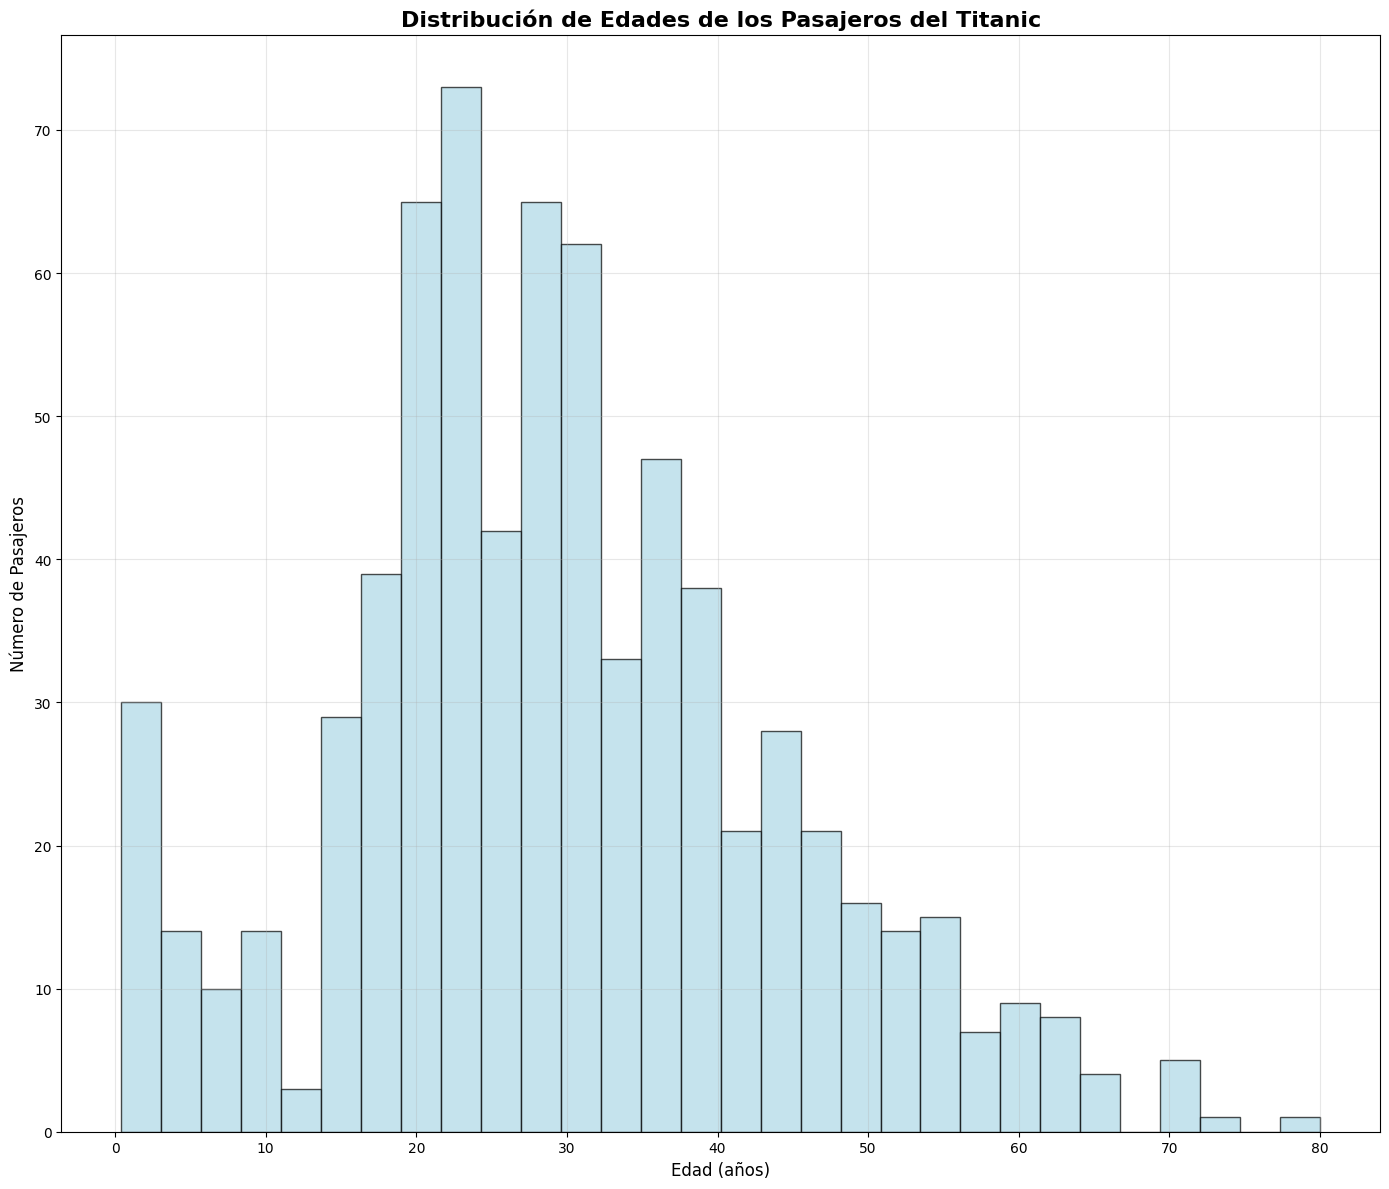

In [8]:
plt.figure(figsize=(14, 12))

plt.hist(df['Age'].dropna(), bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Edades de los Pasajeros del Titanic', fontsize=16, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Número de Pasajeros', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

-  Hi ha moltes dades sense informació (*NaNs*)? Tingueu en compte que alguns mètodes no les toleren durant l’aprenentatge. 
   - Com ja hem comentat en la pregunta 1, nomes hi ha tres columnes amb Nans de les cuals nomes 2 son notables, ja que en una de les 3 nomes hi ha dos NaNs, per tant es irrellevant. Per altre banda en les altres dos tenim una molt afectada per Nans que seria cabin amb 687, pero realment es una variable que per el algorisme no ens aporta informacio i descarteriem, ja que al tenir tantes NaNs tampoc val la pena omplirla. Per altra banda edat si qu es un valor amb 177 NaNs que si que ens pots ser util per el analisis per tant si que el tindrem en compte i l'omplirem.
      - Com afecta la classificació si les filtreu? 
         - En el nostre cas podriem filtrar les de cabin com ja he dit ja que no en saprten informació de mes. Es veritat que els passatger amb Cabina van sobreviure un 66%, a diferencia dels sense cabina que nomes va ser 29% els supervivents. Auqesta estadisitica ens podria portar a pensar que es important aquesta informació pero la realitat es que no ens aporta res ja que els que ens aporta aquest informació es el mateix que la variable classe ja que tots els que tots els que tenien cabina eren de 1ra classe, o gairabe tots. Per altre banda en cas de omplir el que faria sera tots els que tenen cabina asignar 1 i tots els sense cabina asignar un 0 ja que a quina cabina estaben es realment irrellevant. 
         - Per Altre Banda en el nostre cas Age si que el tindriem que omplir ja que te 177 NaNs les cuals seria millor tenir en compte i podriem omplir-les a aprtir de la mediana ja que amb la mitja tindriem em compte passatger molt gran si molt petits que podria fer variar massa la mitja.
      - I si les reompliu? Com ho faríeu? [Pista](https://scikit-learn.org/stable/modules/impute.html)  
         - Aquesta documentació de la llibrearia sklearn ens diu que la llibreria te diferents maneres de poder omplir Nans mitjançant la funcio SimpleImputer, entre elles trobem:
            - Mean (Omplir amnb la mitjana)
            - Median (Omplir amb la mediana i la que em dit que trobem mes precicia per la edat)
            - most_frequent (Omplir amb el valor mes frquent de les variables, aquest el podriem utilitzar per omplir les 2 Nans de Embarked, o tambe per dos files sobre 800 podriem eliminar-ho)
            - Constant (Tal i com diu el nom omplir amb una costant que nosaltres decidim) 

-  Hi ha dades categòriques? Quina seria la codificació més adequada?
   - Per codificar tindirem 5 atributs categorics entre elles es troba: Sex, Embarked, Pclass, Cabin i ticket.
      - **Sex**: Aquest el podrem cabiar a Binari: 0 = male i 1 = female.
      - **Pclass**: Aquest cas simplament podriem asignar 1ra classse = 1, 2na classe = 2 i 3ra classe = 3. Aqui hom podem fer aixi ja que les classe ssegueixen un ordre que es pot mantenir la mateixa llogica amb els numeros.
      - **Cabin**: Aqui es una mica mes complicat de codificar ja que tenim moltes cabines diferents. El que podriem fer es calcular per cada cabina quina tassa de supervivencia va tenir. per exemple, Cabina C85, 3 passatgers i sobreviuen 2, la tasa seria del 0.66 i seria el valor que li asignariem i aixi amb totes les dades del atribut Cabin.
      - **Embarked**: 

-  Es poden extreure atributs addicionals a partir de les variables categòriques (per exemple, aplicant alguna regla sobre el text)?  
-  Caldria aplicar PCA? Quins beneficis o inconvenients tindria?  
-  Seria útil aplicar alguna tècnica de selecció de *features*? Ho trobeu necessari?  
-  Es podrien aplicar *PolynomialFeatures* per millorar la classificació? En quins models tindria sentit fer-ho? 

### 3. Selecció de mètriques – **1.5 punts**

En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)).  

Per començar, entreneu una **regressió logística** (no cal separar *train-test*). A partir d’aquesta, genereu una sèrie de funcions per analitzar els resultats. Aquestes funcions serviran més endavant.  

També caldrà triar la mètrica que farem servir posteriorment per escollir el millor model.  

**Preguntes:**  
-  A teoria hem vist el comportament de l’`accuracy_score` en dades no balancejades. Quina de les següents mètriques creieu que és més adequada pel vostre problema? Justifiqueu-ho.  
   - `accuracy_score`  
   - `f1_score`  
   - `average_precision_score`  
-  Abans d’entrenar models, genereu una suite de funcions per analitzar gràficament el rendiment.  
   -  Mostreu la *Precision-Recall Curve* i la *ROC Curve*.  
   -  Quina és més rellevant per al vostre dataset?  
   -  Expliqueu amb les vostres paraules la diferència entre ambdues. [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
-  Què mostra el [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)?  
   -  Quina mètrica triareu per optimitzar la classificació en el vostre cas?  

> **Nota:** En aquest apartat **no es valoren els resultats obtinguts**. El que s’avalua és:  
> - L’elecció raonada de la mètrica de classificació.  
> - Saber quines gràfiques cal generar per analitzar els resultats.  
>   
> Recordeu: abans de solucionar un problema cal tenir molt clara la mètrica d’error que s’utilitzarà, i aquesta decisió s’ha de prendre **abans d’entrenar models**.  


### 4. Selecció de models amb validació creuada – **4 punts**

Fent servir la mètrica seleccionada a l’apartat anterior, cal escollir una sèrie de models i, mitjançant **validació creuada**, seleccionar el millor model amb els seus hiperparàmetres òptims, trobats a través d’una cerca (*hyperparameter search*).  

Aquesta tasca s’emmarca dins de l’aprenentatge computacional **supervisat**.  
A *scikit-learn* disposem de diverses tècniques ([documentació](https://scikit-learn.org/stable/supervised_learning.html)). A classe hem vist tècniques com:  
- Regressió logística  
- SVM amb diferents *kernels*  
- K-Nearest Neighbours (KNN)  
- Arbres de decisió  
- Random Forest  
- Gradient Boosting  

Per aquest apartat es demana seleccionar **un mínim de 4 models** (per exemple: regressió logística, random forest, KNN, SVM).  

**Preguntes:**  
-  Quins models heu considerat? Per què els heu seleccionat?  
-  Fent servir validació creuada, escolliu el millor model (amb hiperparàmetres per defecte).  
   -  Per què és important fer servir validació creuada?  
   -  Heu de fer servir algun [tipus específic de validació creuada](https://scikit-learn.org/stable/modules/cross_validation.html)?  
-  Seleccioneu un conjunt d’**hiperparàmetres** a provar per a cada model i realitzeu la cerca corresponent.  
   -  Hi ha algun model que es pugui descartar de primeres? Per què?  
-  Mostreu els resultats en una taula amb: model, experiments realitzats, resultats (train i test) i, opcionalment, temps d’entrenament.  
-  Quin tipus de **K-fold** heu escollit per a la selecció de models i per a la selecció amb hiperparàmetres?  
   -  Com afecta el nombre de folds al resultat final?  
-  Quines formes de buscar el millor paràmetre heu trobat?  
   -  Són costoses computacionalment?  
   -  [Documentació *Grid Search*](https://scikit-learn.org/stable/modules/grid_search.html)  
   -  Quina heu seleccionat?  
-  Si disposem de recursos limitats (per exemple, un PC durant 1 hora), quin mètode creieu que donarà millor resultat final?  
-  Existeixen mètodes de cerca més eficients? ([scikit-optimize](https://scikit-optimize.github.io/stable/))  
-  Opcional: Configureu diferents mètodes de cerca per executar-se durant el mateix temps (0,5–1 h) amb el model i el mètode de cross-validation escollit.  
   -  Analitzeu quin ha arribat a una millor solució.  
   -  (Ajuda: estimeu el temps d’entrenament d’un model per trobar el número d’iteracions possibles.)  



### 5. Anàlisi final – **1.5 punts**

Un cop seleccionat el millor model amb els hiperparàmetres òptims, cal elaborar un **report final** amb els resultats obtinguts.  

**Preguntes:**  
-  Mostreu les corbes ROC/PR (la que hàgiu escollit a l’apartat 3) i interpreteu els resultats.  
-  Analitzeu en detall les diferents mètriques que considereu adients.  
  -  Comentar breument com podríeu aplicar aquest model en un futur (cas d’ús).  
-  Quines possibles millores es podrien fer al vostre model?  